In [1]:
import warnings
warnings.filterwarnings('ignore')

# Polynomial Regression with Sklearn

Till now, we have covered most of the theory behind Polynomial Regression. Now, let’s implement these concepts on the Boston Housing dataset.

First, we will import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Next, we will load the housing data from the scikit-learn library and understand it.

In [2]:
boston_dataset = load_boston()

We print the value of the boston_dataset to understand what it contains

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Dataset description:

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The price of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.
We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [7]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to elaborate polynomial regression visually, we will use LSTAT as our only feature for now. Using a scatter plot let’s see how this feature varies with MEDV.

Text(0, 0.5, 'MEDV')

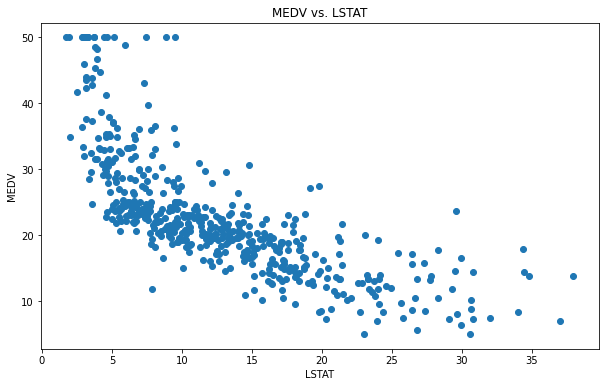

In [8]:
plt.figure(figsize=(10, 6))

X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']

plt.scatter(X, Y, marker='o')
plt.title('MEDV vs. LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404,)
(102, 1)
(102,)


Let's visualize the split on a scatter plot:

Text(0, 0.5, 'MEDV')

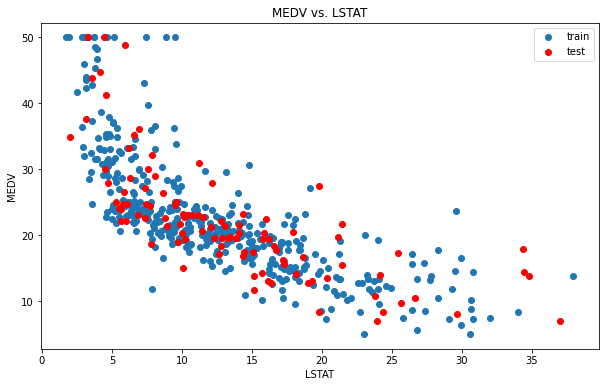

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, marker='o')
plt.scatter(X_test, y_test, marker='o', c='red')
plt.title('MEDV vs. LSTAT')
plt.legend(['train', 'test'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

We use scikit-learn’s LinearRegression to train our model on the training set and measure performance on both the training and test sets.

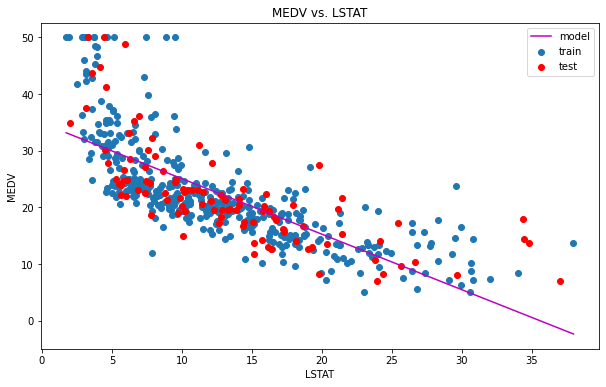

In [11]:
# fit linear model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# predicting over training & testing datasets
y_train_pred = model_lin.predict(X_train)
y_test_pred = model_lin.predict(X_test)

# plot initial dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, marker='o')
plt.scatter(X_test, y_test, marker='o', c='red')

# sort features and predictions
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(np.array(X_train) ,y_train_pred), key=sort_axis)
X_train_sorted, y_train_pred_sorted = zip(*sorted_zip)

# Add linear model
plt.plot(X_train_sorted, y_train_pred_sorted, color='m')   
plt.title('MEDV vs. LSTAT')
plt.legend(['model', 'train', 'test'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Model hypothesis function:

In [12]:
def generate_model_hypothesis(intercept, coefficients):
    formula = "y = " + str(np.round(intercept, 3))

    for power, theta in np.ndenumerate(coefficients):
        if theta > 0:
            formula = formula + "+"+str(np.round(theta,3))+"x^"+str(power[0]+1)
        if theta < 0:
            formula = formula +str(np.round(theta,3))+"x^"+str(power[0]+1)
            
    return formula

In [13]:
generate_model_hypothesis(model_lin.intercept_, model_lin.coef_)

'y = 34.873-0.98x^1'

We can see that the straight line is unable to capture the patterns in the data. This is an example of **under-fitting**. Computing the RMSE and R²-score of the linear line gives:

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.5523019908037391


The model performance for testing set
--------------------------------------
RMSE is 6.2307165730986815
R2 score is 0.5041523728903132


To overcome **under-fitting**, we need to increase the complexity of the model.
To generate a higher-order equation we can add powers of the original features as new features. 

In [15]:
def create_polynomial_regression_model(degree):
    # Adding polynomial features
    polynomial_features= PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # predicting over training & testing datasets
    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)

    # plot initial dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, marker='o')
    plt.scatter(X_test, y_test, marker='o', c='red')

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(np.array(X_train) ,y_train_pred_poly), key=sort_axis)

    X_train_sorted, y_train_pred_poly_sorted = zip(*sorted_zip)

    plt.plot(X_train_sorted, y_train_pred_poly_sorted, color='m')
    plt.title('MEDV vs. LSTAT')
    plt.legend(['model', 'train', 'test'])
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.show()
    
    
    print("model hypothesis: ", generate_model_hypothesis(model_poly.intercept_, model_poly.coef_))
    print("\n")
    
    # model evaluation for training set
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred_poly)))
    r2 = r2_score(y_train, y_train_pred_poly)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred_poly)))
    r2 = r2_score(y_test, y_test_pred_poly)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

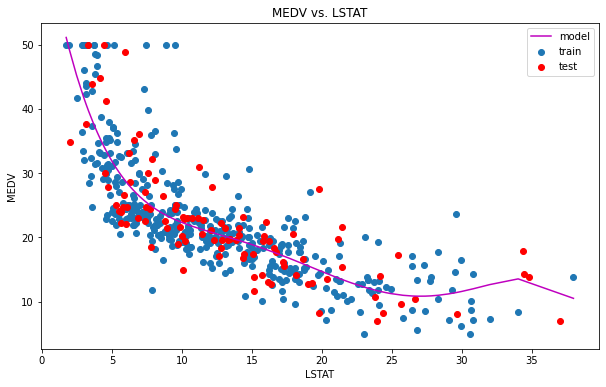

model hypothesis:  y = 69.51-12.835x^2+1.393x^3-0.075x^4+0.002x^5-0.0x^6


The model performance for training set
--------------------------------------
RMSE is 5.189224470483828
R2 score is 0.6865248142011549


The model performance for testing set
--------------------------------------
RMSE is 5.176942964726688
R2 score is 0.6576904564361374


In [16]:
create_polynomial_regression_model(5)

Fitting a linear regression model on the transformed features gives the above plot. It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. Computing the RMSE and R²-score of the quadratic plot shows better results.

For degree=15, the model is also capturing the noise in the data. This is an example of **over-fitting**. Even though this model passes through many of the data points, it will fail to generalize on unseen data.

# Ridge, Lasso & Elastic Net with Sklearn

Let's use the same housing example, this time we will consider all input features (multi-variate linear regression).

In [17]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Let's load the boston data, load it into a pandas dataframe, and split data into a training set and a testing set.

In [18]:
boston_dataset = load_boston()

feature_cols = boston_dataset.feature_names.tolist()

boston = pd.DataFrame(boston_dataset.data, columns=feature_cols)
boston['MEDV'] = boston_dataset.target

X = pd.DataFrame(np.c_[boston[feature_cols]], columns = feature_cols)
Y = boston[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Let's fit a multivariate polynomial regression model of the second degree, and evaluate its performance.

In [19]:
# fit linear model
# Adding polynomial features
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

In [20]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.424742963026645
R2 score is 0.9315569004651907


The model performance for testing set
--------------------------------------
RMSE is 3.1965276513375467
R2 score is 0.8694943908781639


Let's plot the weight coefficients of the first degree features of our model:

<AxesSubplot:title={'center':'Model Coefficients'}>

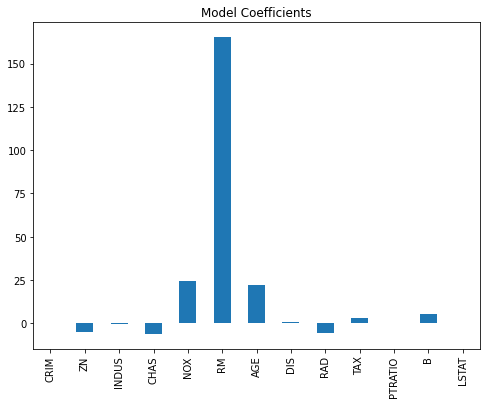

In [21]:
coef = pd.Series(model_poly.coef_[0][:13], feature_cols)

plt.figure(figsize=(8, 6))
coef.plot(kind='bar', title='Model Coefficients')

### Ridge Regression

Now, let's try to train a ridge model with a regularization parameter $\lambda = 0.05$.

In [22]:
## training the model
model_ridge = Ridge(alpha=0.02, normalize=True)
model_ridge.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = model_ridge.predict(X_train_poly)
y_test_pred = model_ridge.predict(X_test_poly)

Let's examine how our model parameters are shrinked with ridge regression:

<AxesSubplot:title={'center':'Model Coefficients'}>

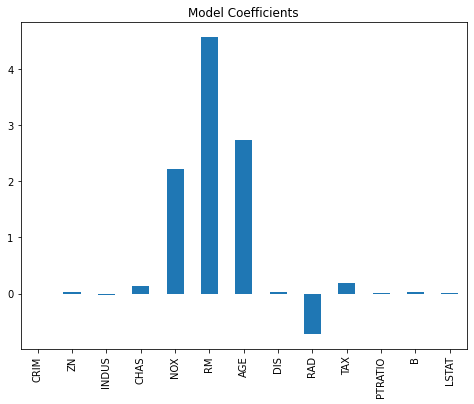

In [23]:
coef = pd.Series(model_ridge.coef_[0][:13], feature_cols)

plt.figure(figsize=(8, 6))
coef.plot(kind='bar', title='Model Coefficients')

We can notice how the model parameters have shrinked.

Ridge Regression model evaluation:

In [24]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.212454315321496
R2 score is 0.879864274858493


The model performance for testing set
--------------------------------------
RMSE is 2.9787431254124646
R2 score is 0.8866717055367623


So, we can see that there is a slight improvement in our model because the value of the RMSE has decreased (or the value of R2 score has increased depending on what metric we're optimizing for). Note that the value of $\lambda$ is a hyperparameter of Ridge Regression, which means that they are not automatically learned by the model instead they have to be set manually or can be tuned using one of the hyperparameter tuning approaches.

You can see that, as we increase the value of $\lambda$, the magnitude of the coefficients decreases, where the values reach zero but not absolute zero.

The value of $\lambda$ can be chosen wisely by iterating it through a range of values and using the one which gives us the lowest error. Let's hypertune $\lambda$ using the grid search approach over a cross-validation dataset. 

In [25]:
## training the model
param_grid = {'alpha': [0.001, 0.005, 0.008, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.5, 1, 10]}

model_ridge = Ridge(normalize=True)
search = GridSearchCV(model_ridge, param_grid, scoring='r2', cv=5)
search.fit(X_train_poly,y_train)

# predicting over training & testing datasets
y_train_pred = search.predict(X_train_poly)
y_test_pred = search.predict(X_test_poly)

The best estimator and its performance on the cross validation set are:

In [26]:
print("Best estimator: ", search.best_estimator_)
print("Best CV R2 score: ", search.best_score_)

Best estimator:  Ridge(alpha=0.001, normalize=True)
Best CV R2 score:  0.8539570210178568


In [27]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.6703396620101145
R2 score is 0.9169898370752083


The model performance for testing set
--------------------------------------
RMSE is 2.8068792529579025
R2 score is 0.899371799208993


### Lasso Regression

Now, let's try to train a lasso model while hypertuning the regularization parameter.

In [28]:
## training the model
param_grid = {'alpha': [10**(-5), 10**(-4), 10**(-3), 0.005, 0.008, 0.01, 0.05, 0.1, 0.5, 1, 10]}

model_lasso = Lasso(normalize=True)
search = GridSearchCV(model_lasso, param_grid, scoring='r2', cv=5)
search.fit(X_train_poly, y_train)

# predicting over training & testing datasets
y_train_pred = search.predict(X_train_poly)
y_test_pred = search.predict(X_test_poly)

The best estimator and its performance on the cross validation set are:

In [29]:
print("Best estimator: ", search.best_estimator_)
print("Best CV R2 score: ", search.best_score_)

Best estimator:  Lasso(alpha=0.0001, normalize=True)
Best CV R2 score:  0.8364463474425128


Let's examine how our model parameters have changed with lasso regression:

<AxesSubplot:title={'center':'Model Coefficients'}>

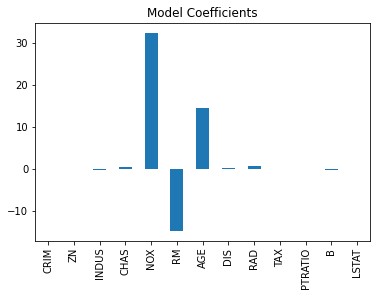

In [30]:
coef = pd.Series(search.best_estimator_.coef_[:13],feature_cols)
coef.plot(kind='bar', title='Model Coefficients')

In Ridge, we have seen that as we increased the value of $\lambda$, coefficients were approaching zero, but if you see the case of Lasso, even at smaller $\lambda$’s, our coefficients are reduced to absolute zeroes. Therefore, lasso selects only some features while reduces the coefficients of others to zero. This property is known as feature selection and is absent in the case of Ridge.

Lasso regression model evaluation:

In [31]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.7157342631571004
R2 score is 0.9141435757729551


The model performance for testing set
--------------------------------------
RMSE is 2.9337146666466984
R2 score is 0.8900720849828134


Which model is the best? Well, everything is relative.

Based on the predefined single evaluation metric, you can fit different models and choose the one with the best performance on the unseen testing dataset. 

Let's compare some of the predictions of houses with their actual prices:

In [32]:
predictions = y_test
predictions['Predicted'] = y_test_pred
predictions = predictions.sort_index().reset_index()
predictions.head(10)

,index,MEDV,Predicted
0,21,19.6,15.981293
1,28,18.4,17.410332
2,34,13.5,15.325320
3,40,34.9,35.912218
4,43,24.7,26.588107
5,49,19.4,18.999143
6,50,19.7,20.559252
7,52,25.0,27.703720
8,56,24.7,23.823525
9,66,19.4,17.224385


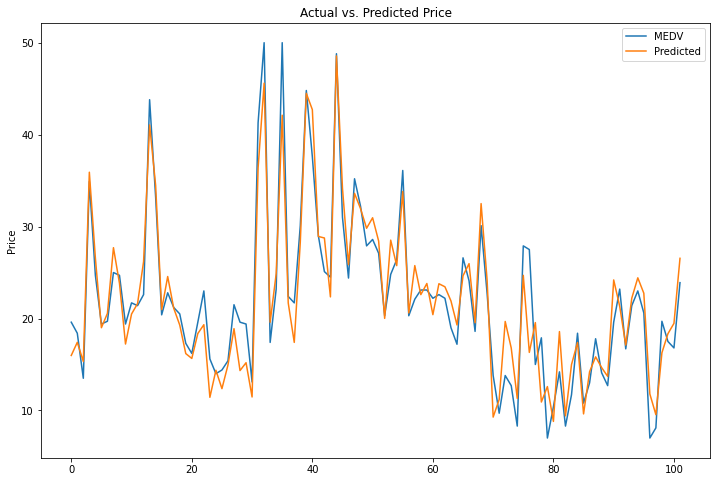

In [33]:
# plot initial dataset
plt.figure(figsize=(12, 8))
predictions['MEDV'].plot(legend=True)
predictions['Predicted'].plot(legend=True)
plt.title('Actual vs. Predicted Price')
plt.ylabel('Price')
plt.show()